# Pyber Ride Sharing

## <p>Based on the analysis of the given data sets, we can notice the following trends:</p>
<ul>
    <li>The major part of all drivers (approximately 78%) come from Urban cities.</li>
    <li>Rural cities have higher average fare, especially comparing to Urban cities.</li>
    <li>Urban city drivers make approximately 68% of all rides and bring 62% of total fare value.</li>

In [30]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [32]:
#read city and ride data
city_file=os.path.join("raw_data","city_data.csv")
city_data=pd.read_csv(city_file)

#file "city_data.csv" contains two records for Port James:
#Port James with 3 drivers and Port James with 15 drivers. 
#in this solution a duplicate was not removed

ride_file=os.path.join("raw_data","ride_data.csv")
ride_data=pd.read_csv(ride_file)

In [33]:
#merge ride and city data into a single DataFrame
merge_table=pd.merge(ride_data, city_data, on="city", how="left")

merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [34]:
#"left" DataFrame contains 2375 entries
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [35]:
#merged table contains 2407 entries, i.e. 32 records for Port James were duplicates
merge_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407 entries, 0 to 2406
Data columns (total 6 columns):
city            2407 non-null object
date            2407 non-null object
fare            2407 non-null float64
ride_id         2407 non-null int64
driver_count    2407 non-null int64
type            2407 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 131.6+ KB


## Bubble Plot of Ride Sharing Data

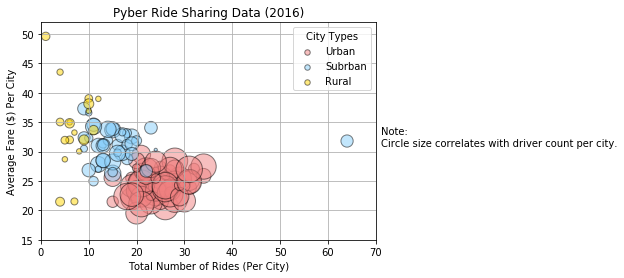

In [36]:
#prepare data for each city type(urban, suburban, rural):
#calculate average fare per city, total number of rides per city, total number of drivers per city


urban=merge_table.loc[merge_table["type"]=="Urban"]
urbangroup=urban.groupby("city")
urban_average_fare=urbangroup["fare"].mean()
urban_city_rides=urbangroup["ride_id"].count()
urban_city_drivers=urbangroup["driver_count"].max()

#----------------

suburban=merge_table.loc[merge_table["type"]=="Suburban"]
suburbangroup=suburban.groupby("city")
suburban_average_fare=suburbangroup["fare"].mean()
suburban_city_rides=suburbangroup["ride_id"].count()
suburban_city_drivers=suburbangroup["driver_count"].max()

#----------------

rural=merge_table.loc[merge_table["type"]=="Rural"]
ruralgroup=rural.groupby("city")
rural_average_fare=ruralgroup["fare"].mean()
rural_city_rides=ruralgroup["ride_id"].count()
rural_city_drivers=ruralgroup["driver_count"].max()

#build bubble plots for each city type

plt.scatter(urban_city_rides, urban_average_fare, color="lightcoral", edgecolor="black",
             label="Urban", alpha=0.5, s=10*urban_city_drivers, linewidths=1)
        
plt.scatter(suburban_city_rides, suburban_average_fare, color="lightskyblue", edgecolor="black",
             label="Subrban", alpha=0.5, s=10*suburban_city_drivers, linewidths=1)

plt.scatter(rural_city_rides, rural_average_fare, color="gold", edgecolor="black",
             label="Rural", alpha=0.5, s=10*rural_city_drivers, linewidths=1)
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($) Per City")
plt.ylim(15,52)
plt.xlim(0,70)
plt.text(71,31,"Note:\nCircle size correlates with driver count per city.")
lgnd=plt.legend(loc="upper right", title="City Types", scatterpoints=1)

#solution for ._sizes comes from https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
#----------------------------------
plt.savefig("pyber_analysis.png")
plt.show()

#blue bubble (outlier) on this chart comes from "merge", not from the actual data set

## Total Fares by City Type

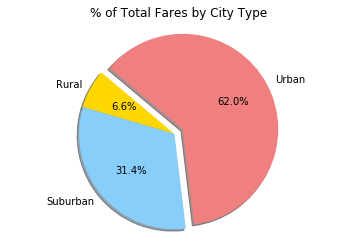

In [37]:
#calculate % of total fares by city type
fare=merge_table.groupby("type").sum()["fare"]
fare_sum=merge_table["fare"].sum()
percent_fare=fare/fare_sum

#create pie chart
labels=['Rural','Suburban','Urban']
colors=['Gold', 'lightskyblue','lightcoral']
explode=[0,0,0.1]
plt.pie(percent_fare,explode=explode,labels=labels,colors=colors, shadow=True, startangle=140, autopct='{:.1f}%'.format)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.savefig("pie_fares.png")
plt.show()

## Total Rides by City Type

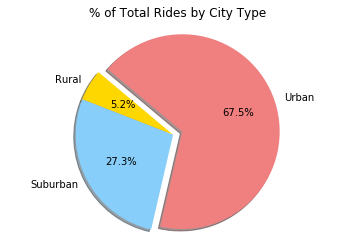

In [38]:
#calculate % of total rides by city type
ride=merge_table.groupby("type").count()["ride_id"]
ride_sum=merge_table["ride_id"].count()
percent_rides=ride/ride_sum

#create pie chart
labels=['Rural','Suburban','Urban']
colors=['Gold', 'lightskyblue','lightcoral']
explode=[0,0,0.1]
plt.pie(percent_rides,explode=explode,labels=labels,colors=colors, shadow=True, startangle=140, autopct='{:.1f}%'.format)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.savefig("pie_rides.png")
plt.show()

## Total Drivers by City Type

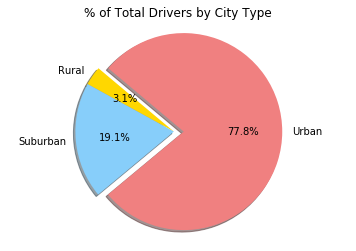

In [39]:
#calculate % of total drivers by city type
city_type=city_data.groupby("type")
total_drivers_type=city_type["driver_count"].sum()
total_drivers=city_data["driver_count"].sum()
percent_drivers=total_drivers_type/total_drivers

#create pie chart
labels=['Rural','Suburban','Urban']
colors=['Gold', 'lightskyblue','lightcoral']
explode=[0,0,0.1]
plt.pie(percent_drivers,explode=explode,labels=labels,colors=colors, shadow=True, startangle=140, autopct='{:.1f}%'.format)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.savefig("pie_drivers.png")
plt.show()
